In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/08_Aug.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,29.500000,81.000000,1,3,1,3331.0,3320.0,3301.0,3118.0,3254.0,3595.0,3303.750000,3142.0
1,29.416667,81.583333,1,3,1,3347.0,3306.0,3268.0,3078.0,3322.0,3490.0,3294.500000,3157.0
2,29.333333,82.166667,1,3,1,3364.0,3315.0,3259.0,3204.0,3401.0,3443.0,3295.666667,3273.0
3,29.250000,82.750000,1,3,1,3355.0,3345.0,3293.0,3132.0,3350.0,3338.0,3292.000000,3249.0
4,29.166667,83.333333,2,3,1,3142.0,3331.0,3320.0,3116.0,3281.0,3153.0,3283.583333,3219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,30.622452,79.727610,23,7,0,3792.0,3736.0,3703.0,3720.0,4040.0,3951.0,3758.333333,3835.0
8924,30.622452,79.727610,24,7,0,3799.0,3749.0,3687.0,3696.0,4015.0,3893.0,3769.416667,3820.0
8925,30.622452,79.727610,24,7,0,3802.0,3729.0,3698.0,3716.0,3961.0,3931.0,3781.833333,3847.0
8926,30.100000,79.727610,24,7,0,3809.0,3754.0,3710.0,3726.0,3990.0,3952.0,3797.083333,3893.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 4992][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.875207,-0.651124,0.942653,-1.660699,-0.512522,0.606894,-0.108164,-0.157297,-0.239854,-1.081817,-0.529011,0.966826,-0.235922
1,-0.814037,-0.680332,0.996390,-1.660699,-0.512522,0.606894,-0.042764,-0.214678,-0.375447,-1.251527,-0.232908,0.514264,-0.276277
2,-0.340991,-0.709540,1.050127,-1.660699,-0.512522,0.606894,0.026723,-0.177790,-0.412427,-0.716939,0.111094,0.311688,-0.271187
3,-0.438863,-0.738748,1.103864,-1.660699,-0.512522,0.606894,-0.010064,-0.054829,-0.272725,-1.022418,-0.110983,-0.140874,-0.287183
4,-0.561202,-0.767956,1.157601,-1.516262,-0.512522,0.606894,-0.880700,-0.112211,-0.161785,-1.090302,-0.411440,-0.938246,-0.323902


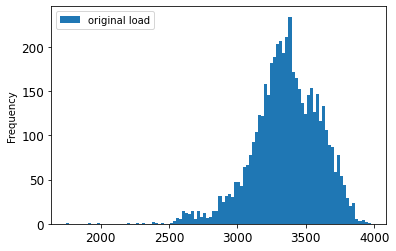

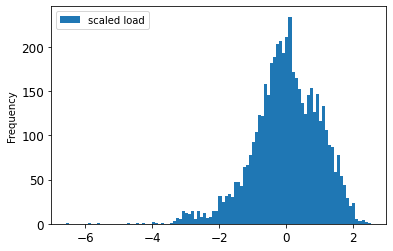

In [8]:
stlf_data[stlf_data.index <= 4992][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4992][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

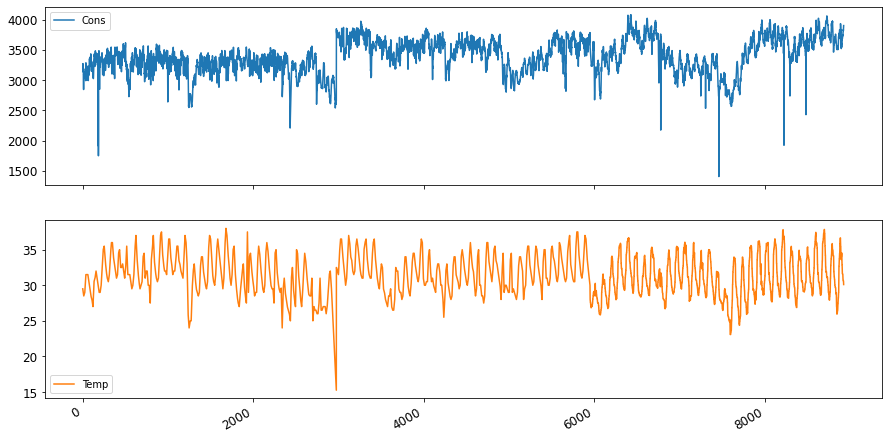

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,-0.875207,-0.651124,0.942653,-1.660699,-0.512522,0.606894,-0.108164,-0.157297,-0.239854,-1.081817,-0.529011,0.966826,-0.235922,-0.814037
1,-0.814037,-0.680332,0.996390,-1.660699,-0.512522,0.606894,-0.042764,-0.214678,-0.375447,-1.251527,-0.232908,0.514264,-0.276277,-0.340991
2,-0.340991,-0.709540,1.050127,-1.660699,-0.512522,0.606894,0.026723,-0.177790,-0.412427,-0.716939,0.111094,0.311688,-0.271187,-0.438863
3,-0.438863,-0.738748,1.103864,-1.660699,-0.512522,0.606894,-0.010064,-0.054829,-0.272725,-1.022418,-0.110983,-0.140874,-0.287183,-0.561202
4,-0.561202,-0.767956,1.157601,-1.516262,-0.512522,0.606894,-0.880700,-0.112211,-0.161785,-1.090302,-0.411440,-0.938246,-0.323902,-0.826271
5,-0.826271,-0.797165,1.211338,-1.516262,-0.512522,0.606894,-0.819388,-0.046632,-0.219309,-1.255770,-0.533365,-1.227024,-0.379162,-0.797725
6,-0.797725,-0.826373,1.265075,-1.516262,-0.512522,0.606894,-0.345239,0.023046,-0.182330,-1.289712,-0.115338,-1.106341,-0.435149,-0.956767
7,-0.956767,-0.855581,1.318812,-1.516262,-0.512522,0.606894,-0.443339,-0.013842,-0.059063,-1.115759,-0.089211,-1.214094,-0.516221,-1.054638
8,-1.054638,-0.884789,1.372549,-1.371824,-0.512522,0.606894,-0.565963,-0.886866,-0.116587,-1.192128,-0.280807,-0.989967,-0.600929,-1.588854
9,-1.588854,-0.913997,1.426286,-1.371824,-0.512522,0.606894,-0.831650,-0.825386,-0.050845,-1.276984,-0.119692,-0.899455,-0.739079,-2.090446


In [11]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,-0.451097,-0.698919,1.386507,1.372490,-0.512522,0.606894,-0.496476,-1.128690,-1.472517,1.158363,1.090846,0.716839,-0.834694,-0.365459
4984,-0.365459,-0.714851,1.411630,1.516927,-0.512522,0.606894,-0.373851,-1.018025,-1.287618,1.149878,1.208416,0.721149,-0.754348,-0.345069
4985,-0.345069,-0.730782,1.436754,1.516927,-0.512522,0.606894,-0.382026,-0.845879,-1.139698,1.149878,1.195353,0.686668,-0.685273,-0.222730
4986,-0.222730,-0.746714,1.461878,1.516927,-0.512522,0.606894,-0.476039,-0.554871,-1.275291,1.255947,1.060365,0.781491,-0.593295,-0.181950
4987,-0.181950,-0.762646,1.487002,1.516927,-0.512522,0.606894,-0.455601,-0.501588,-1.135589,1.434143,1.195353,0.803041,-0.510041,-0.141170
4988,-0.141170,-0.778578,1.512125,1.661365,-0.512522,0.606894,-0.369764,-0.378627,-1.024650,1.408686,1.230188,0.820282,-0.432968,0.123899
4989,0.123899,-0.794509,1.537249,1.661365,-0.512522,0.606894,-0.349326,-0.386824,-0.852077,1.535969,1.465329,1.104750,-0.347533,0.397123
4990,0.397123,-0.810441,1.562373,1.661365,-0.512522,0.606894,-0.226702,-0.481094,-0.560346,1.633553,1.652570,1.315945,-0.263552,0.254394
4991,0.254394,-0.826373,1.587497,1.661365,-0.512522,0.606894,-0.185827,-0.460601,-0.506931,1.565669,1.408721,1.242673,-0.197022,0.229926
4992,0.229926,-0.826373,1.587497,-1.660699,0.000000,0.606894,-0.144952,-0.374528,-0.383665,1.315345,1.291151,1.121990,-0.143580,NaN


In [12]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.interpolate()

In [13]:
train_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4983,-0.451097,-0.698919,1.386507,1.372490,-0.512522,0.606894,-0.496476,-1.128690,-1.472517,1.158363,1.090846,0.716839,-0.834694,-0.365459
4984,-0.365459,-0.714851,1.411630,1.516927,-0.512522,0.606894,-0.373851,-1.018025,-1.287618,1.149878,1.208416,0.721149,-0.754348,-0.345069
4985,-0.345069,-0.730782,1.436754,1.516927,-0.512522,0.606894,-0.382026,-0.845879,-1.139698,1.149878,1.195353,0.686668,-0.685273,-0.222730
4986,-0.222730,-0.746714,1.461878,1.516927,-0.512522,0.606894,-0.476039,-0.554871,-1.275291,1.255947,1.060365,0.781491,-0.593295,-0.181950
4987,-0.181950,-0.762646,1.487002,1.516927,-0.512522,0.606894,-0.455601,-0.501588,-1.135589,1.434143,1.195353,0.803041,-0.510041,-0.141170
4988,-0.141170,-0.778578,1.512125,1.661365,-0.512522,0.606894,-0.369764,-0.378627,-1.024650,1.408686,1.230188,0.820282,-0.432968,0.123899
4989,0.123899,-0.794509,1.537249,1.661365,-0.512522,0.606894,-0.349326,-0.386824,-0.852077,1.535969,1.465329,1.104750,-0.347533,0.397123
4990,0.397123,-0.810441,1.562373,1.661365,-0.512522,0.606894,-0.226702,-0.481094,-0.560346,1.633553,1.652570,1.315945,-0.263552,0.254394
4991,0.254394,-0.826373,1.587497,1.661365,-0.512522,0.606894,-0.185827,-0.460601,-0.506931,1.565669,1.408721,1.242673,-0.197022,0.229926
4992,0.229926,-0.826373,1.587497,-1.660699,0.000000,0.606894,-0.144952,-0.374528,-0.383665,1.315345,1.291151,1.121990,-0.143580,0.229926


In [14]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
0,-0.814037
1,-0.340991
2,-0.438863
3,-0.561202
4,-0.826271
...,...
4988,0.123899
4989,0.397123
4990,0.254394
4991,0.229926


In [15]:
X_train = train_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.875207,-0.651124,0.942653,-1.660699,-0.512522,0.606894,-0.108164,-0.157297,-0.239854,-1.081817,-0.529011,0.966826,-0.235922
1,-0.814037,-0.680332,0.996390,-1.660699,-0.512522,0.606894,-0.042764,-0.214678,-0.375447,-1.251527,-0.232908,0.514264,-0.276277
2,-0.340991,-0.709540,1.050127,-1.660699,-0.512522,0.606894,0.026723,-0.177790,-0.412427,-0.716939,0.111094,0.311688,-0.271187
3,-0.438863,-0.738748,1.103864,-1.660699,-0.512522,0.606894,-0.010064,-0.054829,-0.272725,-1.022418,-0.110983,-0.140874,-0.287183
4,-0.561202,-0.767956,1.157601,-1.516262,-0.512522,0.606894,-0.880700,-0.112211,-0.161785,-1.090302,-0.411440,-0.938246,-0.323902
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,-0.141170,-0.778578,1.512125,1.661365,-0.512522,0.606894,-0.369764,-0.378627,-1.024650,1.408686,1.230188,0.820282,-0.432968
4989,0.123899,-0.794509,1.537249,1.661365,-0.512522,0.606894,-0.349326,-0.386824,-0.852077,1.535969,1.465329,1.104750,-0.347533
4990,0.397123,-0.810441,1.562373,1.661365,-0.512522,0.606894,-0.226702,-0.481094,-0.560346,1.633553,1.652570,1.315945,-0.263552
4991,0.254394,-0.826373,1.587497,1.661365,-0.512522,0.606894,-0.185827,-0.460601,-0.506931,1.565669,1.408721,1.242673,-0.197022


In [16]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4993, 13, 1)

In [17]:
valid = stlf_data.copy()[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,3387.0,29.000000,87.416667,1.0,4.0,1.0,3387.0,3272.0,3264.0,3600.0,3652.0,3576.0,3335.166667
4994,3352.0,29.000000,86.833333,1.0,4.0,1.0,3454.0,3302.0,3241.0,3597.0,3722.0,3615.0,3344.416667
4995,3363.0,29.000000,86.250000,1.0,4.0,1.0,3419.0,3312.0,3246.0,3588.0,3740.0,3631.0,3354.166667
4996,3341.0,29.000000,85.666667,2.0,4.0,1.0,3413.0,3322.0,3267.0,3571.0,3710.0,3600.0,3360.333333
4997,3316.0,29.000000,85.083333,2.0,4.0,1.0,3387.0,3387.0,3272.0,3532.0,3678.0,3551.0,3364.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,3656.0,30.217391,86.250000,24.0,6.0,1.0,3627.0,3725.0,3666.0,3663.0,3697.0,3117.0,3686.500000
5950,3646.0,30.108696,87.166667,24.0,6.0,1.0,3657.0,3658.0,3757.0,3762.0,3773.0,2860.0,3677.250000
5951,3786.0,30.000000,88.083333,24.0,6.0,1.0,3724.0,3652.0,3756.0,3747.0,3787.0,2985.0,3679.750000
5952,3537.0,28.002450,85.345345,1.0,5.0,1.0,3516.0,3559.0,3448.0,3825.0,3682.0,3187.0,3541.000000


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-0.048042,-1.505231,1.924693,-1.658081,-0.168494,0.499675,-0.043554,-0.506594,-0.532387,0.962405,1.178584,0.993367,-0.262940
4994,-0.189985,-1.505231,1.867611,-1.658081,-0.168494,0.499675,0.228975,-0.384334,-0.626387,0.950467,1.458922,1.158914,-0.223652
4995,-0.145374,-1.505231,1.810529,-1.658081,-0.168494,0.499675,0.086609,-0.343580,-0.605952,0.914650,1.531009,1.226831,-0.182240
4996,-0.234595,-1.505231,1.753447,-1.513750,-0.168494,0.499675,0.062203,-0.302827,-0.520126,0.846998,1.410864,1.095242,-0.156048
4997,-0.335983,-1.505231,1.696364,-1.513750,-0.168494,0.499675,-0.043554,-0.037929,-0.499692,0.691795,1.282709,0.887247,-0.140474
4998,-0.262984,-1.505231,1.639282,-1.513750,-0.168494,0.499675,-0.185920,0.235119,-0.377083,0.747509,1.334772,0.810841,-0.129148
4999,-0.356261,-1.505231,1.582200,-1.513750,-0.168494,0.499675,-0.141176,0.092482,-0.336214,0.632101,1.298729,0.823575,-0.129502
5000,-0.400871,-1.505231,1.525118,-1.369419,-0.168494,0.499675,-0.230664,0.068030,-0.295344,0.592305,1.230646,0.742924,-0.137289
5001,-0.518481,-1.505231,1.468036,-1.369419,-0.168494,0.499675,-0.332353,-0.037929,-0.029693,0.691795,1.410864,0.844799,-0.178347
5002,-0.595536,-1.505231,1.410954,-1.369419,-0.168494,0.499675,-0.259137,-0.180566,0.244132,0.846998,1.547028,0.899982,-0.249844


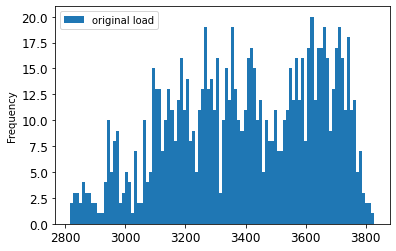

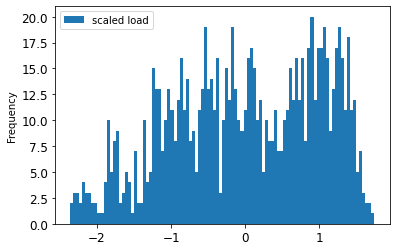

In [19]:
stlf_data[(stlf_data.index >=4993) & (stlf_data.index <=5953)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4993) & (valid.index <=5953)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4993,-0.048042,-1.505231,1.924693,-1.658081,-0.168494,0.499675,-0.043554,-0.506594,-0.532387,0.962405,1.178584,0.993367,-0.262940,-0.189985
4994,-0.189985,-1.505231,1.867611,-1.658081,-0.168494,0.499675,0.228975,-0.384334,-0.626387,0.950467,1.458922,1.158914,-0.223652,-0.145374
4995,-0.145374,-1.505231,1.810529,-1.658081,-0.168494,0.499675,0.086609,-0.343580,-0.605952,0.914650,1.531009,1.226831,-0.182240,-0.234595
4996,-0.234595,-1.505231,1.753447,-1.513750,-0.168494,0.499675,0.062203,-0.302827,-0.520126,0.846998,1.410864,1.095242,-0.156048,-0.335983
4997,-0.335983,-1.505231,1.696364,-1.513750,-0.168494,0.499675,-0.043554,-0.037929,-0.499692,0.691795,1.282709,0.887247,-0.140474,-0.262984
4998,-0.262984,-1.505231,1.639282,-1.513750,-0.168494,0.499675,-0.185920,0.235119,-0.377083,0.747509,1.334772,0.810841,-0.129148,-0.356261
4999,-0.356261,-1.505231,1.582200,-1.513750,-0.168494,0.499675,-0.141176,0.092482,-0.336214,0.632101,1.298729,0.823575,-0.129502,-0.400871
5000,-0.400871,-1.505231,1.525118,-1.369419,-0.168494,0.499675,-0.230664,0.068030,-0.295344,0.592305,1.230646,0.742924,-0.137289,-0.518481
5001,-0.518481,-1.505231,1.468036,-1.369419,-0.168494,0.499675,-0.332353,-0.037929,-0.029693,0.691795,1.410864,0.844799,-0.178347,-0.595536
5002,-0.595536,-1.505231,1.410954,-1.369419,-0.168494,0.499675,-0.259137,-0.180566,0.244132,0.846998,1.547028,0.899982,-0.249844,-0.632036


In [21]:
valid_shifted = valid_shifted.interpolate()

In [22]:
valid_shifted.tail(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5944,0.953671,-0.737036,1.362026,1.517204,0.948217,0.499675,1.376037,1.066491,1.241346,1.256893,1.486956,0.246282,1.184353,0.925282
5945,0.925282,-0.784456,1.451727,1.517204,0.948217,0.499675,1.331293,1.099093,1.167781,1.189241,1.334772,0.259017,1.165594,1.046948
5946,1.046948,-0.831875,1.541427,1.517204,0.948217,0.499675,1.058764,1.469950,0.746826,1.153424,1.667173,0.208079,1.193910,1.318667
5947,1.318667,-0.879294,1.631128,1.517204,0.948217,0.499675,1.034359,1.465875,0.889869,1.197200,1.623120,-1.175726,1.233552,1.042892
5948,1.042892,-0.926714,1.720828,1.661535,0.948217,0.499675,0.961142,1.384368,1.077869,1.248934,1.607101,-0.997444,1.232844,1.042892
5949,1.042892,-0.974133,1.810529,1.661535,0.948217,0.499675,0.932669,1.339539,1.110564,1.213118,1.358801,-0.954996,1.229304,1.002337
5950,1.002337,-1.021553,1.900229,1.661535,0.948217,0.499675,1.054697,1.066491,1.482476,1.607095,1.663168,-2.045910,1.190016,1.570109
5951,1.570109,-1.068972,1.989930,1.661535,0.948217,0.499675,1.327226,1.042039,1.478389,1.547402,1.719236,-1.515310,1.200635,0.560286
5952,0.560286,-1.940421,1.722004,-1.658081,0.389861,0.499675,0.481166,0.663031,0.219610,1.857808,1.298729,-0.657860,0.611311,0.503509
5953,0.503509,-1.940421,1.722004,-1.658081,0.389861,0.499675,0.501504,0.691558,0.301349,1.674748,1.426883,-0.763980,0.630778,0.503509


In [23]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4993,-0.189985
4994,-0.145374
4995,-0.234595
4996,-0.335983
4997,-0.262984
...,...
5949,1.002337
5950,1.570109
5951,0.560286
5952,0.503509


In [24]:
X_valid = valid_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4993,-0.048042,-1.505231,1.924693,-1.658081,-0.168494,0.499675,-0.043554,-0.506594,-0.532387,0.962405,1.178584,0.993367,-0.262940
4994,-0.189985,-1.505231,1.867611,-1.658081,-0.168494,0.499675,0.228975,-0.384334,-0.626387,0.950467,1.458922,1.158914,-0.223652
4995,-0.145374,-1.505231,1.810529,-1.658081,-0.168494,0.499675,0.086609,-0.343580,-0.605952,0.914650,1.531009,1.226831,-0.182240
4996,-0.234595,-1.505231,1.753447,-1.513750,-0.168494,0.499675,0.062203,-0.302827,-0.520126,0.846998,1.410864,1.095242,-0.156048
4997,-0.335983,-1.505231,1.696364,-1.513750,-0.168494,0.499675,-0.043554,-0.037929,-0.499692,0.691795,1.282709,0.887247,-0.140474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5949,1.042892,-0.974133,1.810529,1.661535,0.948217,0.499675,0.932669,1.339539,1.110564,1.213118,1.358801,-0.954996,1.229304
5950,1.002337,-1.021553,1.900229,1.661535,0.948217,0.499675,1.054697,1.066491,1.482476,1.607095,1.663168,-2.045910,1.190016
5951,1.570109,-1.068972,1.989930,1.661535,0.948217,0.499675,1.327226,1.042039,1.478389,1.547402,1.719236,-1.515310,1.200635
5952,0.560286,-1.940421,1.722004,-1.658081,0.389861,0.499675,0.481166,0.663031,0.219610,1.857808,1.298729,-0.657860,0.611311


In [25]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(961, 13, 1)


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(128, input_shape=(1,1)))
model.add(Dropout(0.3))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.007)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=12,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
417/417 [==============================] - 5s 13ms/step - loss: 0.2653 - val_loss: 0.1983
Epoch 2/300
417/417 [==============================] - 5s 11ms/step - loss: 0.1894 - val_loss: 0.0982
Epoch 3/300
417/417 [==============================] - 5s 11ms/step - loss: 0.1287 - val_loss: 0.0618
Epoch 4/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1097 - val_loss: 0.0718
Epoch 5/300
417/417 [==============================] - 5s 12ms/step - loss: 0.1029 - val_loss: 0.0578
Epoch 6/300
417/417 [==============================] - 5s 11ms/step - loss: 0.1043 - val_loss: 0.0548
Epoch 7/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0991 - val_loss: 0.0642
Epoch 8/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0984 - val_loss: 0.0549
Epoch 9/300
417/417 [==============================] - 5s 11ms/step - loss: 0.0992 - val_loss: 0.0491
Epoch 10/300
417/417 [==============================] - 5s 11ms/step - loss: 0.096

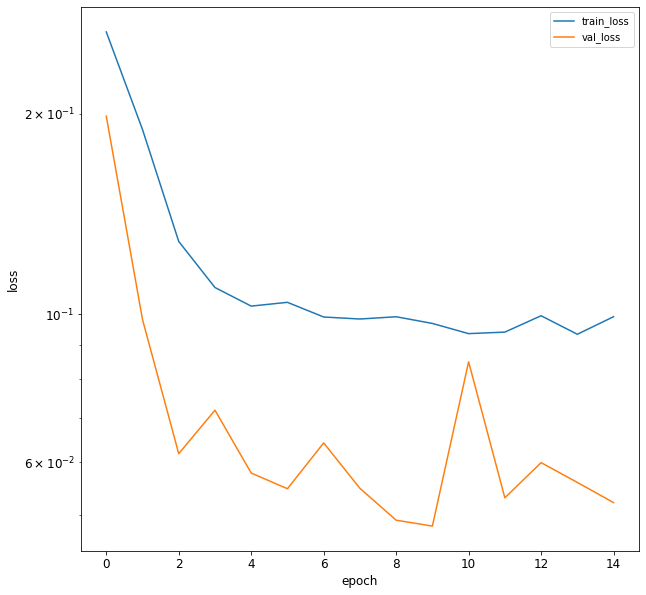

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[stlf_data.index >= 5954][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,3521.0,27.797451,86.043576,1.0,5.0,1.0,3541.0,3553.0,3573.0,3774.0,3699.0,3164.0,3541.250000
5955,3499.0,27.592451,86.741806,1.0,5.0,1.0,3572.0,3519.0,3567.0,3724.0,3707.0,3178.0,3535.583333
5956,3460.0,27.592451,86.741806,2.0,5.0,1.0,3537.0,3516.0,3559.0,3640.0,3676.0,3136.0,3527.333333
5957,3449.0,27.592451,86.741806,2.0,5.0,1.0,3523.0,3521.0,3566.0,3646.0,3636.0,3145.0,3517.583333
5958,3419.0,27.392451,87.036713,2.0,5.0,1.0,3521.0,3541.0,3553.0,3634.0,3585.0,3118.0,3506.416667
5959,3413.0,27.192451,87.331620,2.0,5.0,1.0,3499.0,3572.0,3519.0,3597.0,3596.0,3088.0,3497.583333
5960,3392.0,27.192451,87.331620,3.0,5.0,1.0,3460.0,3537.0,3516.0,3558.0,3559.0,3030.0,3487.250000
5961,3366.0,27.192451,87.331620,3.0,5.0,1.0,3449.0,3523.0,3521.0,3569.0,3536.0,2977.0,3474.333333
5962,3352.0,27.017451,88.772835,3.0,5.0,1.0,3419.0,3521.0,3541.0,3599.0,3512.0,2919.0,3458.583333
5963,3345.0,26.842451,90.214050,3.0,5.0,1.0,3413.0,3499.0,3572.0,3561.0,3488.0,2895.0,3439.666667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2974 entries, 5954 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2974 non-null   float64
 1   Temp    2974 non-null   float64
 2   Hum     2974 non-null   float64
 3   A       2974 non-null   float64
 4   B       2974 non-null   float64
 5   C       2974 non-null   float64
 6   D       2974 non-null   float64
 7   E       2974 non-null   float64
 8   F       2974 non-null   float64
 9   G       2974 non-null   float64
 10  H       2974 non-null   float64
 11  I       2974 non-null   float64
 12  J       2974 non-null   float64
dtypes: float64(13)
memory usage: 325.3 KB


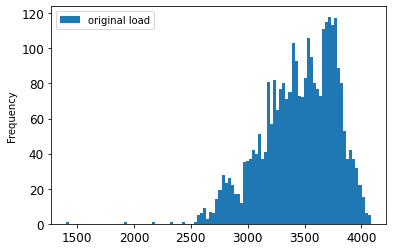

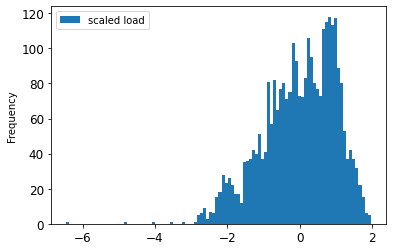

In [33]:
stlf_data[stlf_data.index >= 5954][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5954][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5954,0.201026,-1.109062,0.906135,-1.663428,0.402026,0.639905,0.265500,0.304684,0.368627,1.016570,0.805564,-0.861736,0.276833,0.131914
5955,0.131914,-1.179614,0.964710,-1.663428,0.402026,0.639905,0.362989,0.197674,0.349733,0.858280,0.831199,-0.816663,0.258335,0.009397
5956,0.009397,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.252921,0.188232,0.324541,0.592352,0.731865,-0.951882,0.231403,-0.025159
5957,-0.025159,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.208893,0.203969,0.346584,0.611347,0.603693,-0.922906,0.199575,-0.119403
5958,-0.119403,-1.248445,0.989450,-1.518879,0.402026,0.639905,0.202604,0.266916,0.305647,0.573357,0.440273,-1.009833,0.163121,-0.138252
5959,-0.138252,-1.317277,1.014191,-1.518879,0.402026,0.639905,0.133418,0.364484,0.198581,0.456222,0.475521,-1.106417,0.134285,-0.204223
5960,-0.204223,-1.317277,1.014191,-1.374330,0.402026,0.639905,0.010770,0.254327,0.189134,0.332756,0.356961,-1.293148,0.100553,-0.285901
5961,-0.285901,-1.317277,1.014191,-1.374330,0.402026,0.639905,-0.023823,0.210264,0.204879,0.367580,0.283262,-1.463780,0.058387,-0.329881
5962,-0.329881,-1.377504,1.135096,-1.374330,0.402026,0.639905,-0.118167,0.203969,0.267859,0.462554,0.206359,-1.650511,0.006972,-0.351872
5963,-0.351872,-1.437732,1.256002,-1.374330,0.402026,0.639905,-0.137036,0.134727,0.365478,0.342253,0.129456,-1.727779,-0.054781,-0.452398


In [35]:
test_shifted = test_shifted.interpolate()
test_shifted.tail(5)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
8923,1.187446,-0.136818,0.376280,1.516643,1.39838,-1.562731,1.054848,0.880648,0.777995,0.845616,1.898233,1.672001,0.985493,1.140325
8924,1.140325,-0.136818,0.376280,1.661192,1.39838,-1.562731,1.076862,0.921564,0.727611,0.769637,1.818125,1.485271,1.021674,1.225144
8925,1.225144,-0.136818,0.376280,1.661192,1.39838,-1.562731,1.086297,0.858617,0.762250,0.832953,1.645093,1.607612,1.062207,1.369651
8926,1.369651,-0.316624,0.376280,1.661192,1.39838,-1.562731,1.108310,0.937301,0.800038,0.864611,1.738018,1.675221,1.111990,1.397925
8927,1.397925,-0.316624,0.373963,1.661192,1.39838,-1.562731,1.190075,1.056900,0.881912,0.924762,1.673932,1.655904,1.157149,1.397925


In [36]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5954,0.131914
5955,0.009397
5956,-0.025159
5957,-0.119403
5958,-0.138252
...,...
8923,1.140325
8924,1.225144
8925,1.369651
8926,1.397925


In [37]:
X_test = test_shifted[['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5954,0.201026,-1.109062,0.906135,-1.663428,0.402026,0.639905,0.265500,0.304684,0.368627,1.016570,0.805564,-0.861736,0.276833
5955,0.131914,-1.179614,0.964710,-1.663428,0.402026,0.639905,0.362989,0.197674,0.349733,0.858280,0.831199,-0.816663,0.258335
5956,0.009397,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.252921,0.188232,0.324541,0.592352,0.731865,-0.951882,0.231403
5957,-0.025159,-1.179614,0.964710,-1.518879,0.402026,0.639905,0.208893,0.203969,0.346584,0.611347,0.603693,-0.922906,0.199575
5958,-0.119403,-1.248445,0.989450,-1.518879,0.402026,0.639905,0.202604,0.266916,0.305647,0.573357,0.440273,-1.009833,0.163121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,1.187446,-0.136818,0.376280,1.516643,1.398380,-1.562731,1.054848,0.880648,0.777995,0.845616,1.898233,1.672001,0.985493
8924,1.140325,-0.136818,0.376280,1.661192,1.398380,-1.562731,1.076862,0.921564,0.727611,0.769637,1.818125,1.485271,1.021674
8925,1.225144,-0.136818,0.376280,1.661192,1.398380,-1.562731,1.086297,0.858617,0.762250,0.832953,1.645093,1.607612,1.062207
8926,1.369651,-0.316624,0.376280,1.661192,1.398380,-1.562731,1.108310,0.937301,0.800038,0.864611,1.738018,1.675221,1.111990


In [38]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2974, 13, 1)

In [39]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2974,13,1)

In [40]:
predictions = model.predict(X_test)
predictions

array([[ 0.14548916],
       [ 0.08891758],
       [-0.00402808],
       ...,
       [ 1.1263988 ],
       [ 1.2525117 ],
       [ 1.2794383 ]], dtype=float32)

In [41]:
feature=stlf_data.copy()[stlf_data.index >= 5954][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3457.008742
dtype: float64
Cons    318.376304
dtype: float64


In [42]:
load_mean=3457.008742
load_std=318.376304
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(2974, 1)


In [43]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(2974, 1)


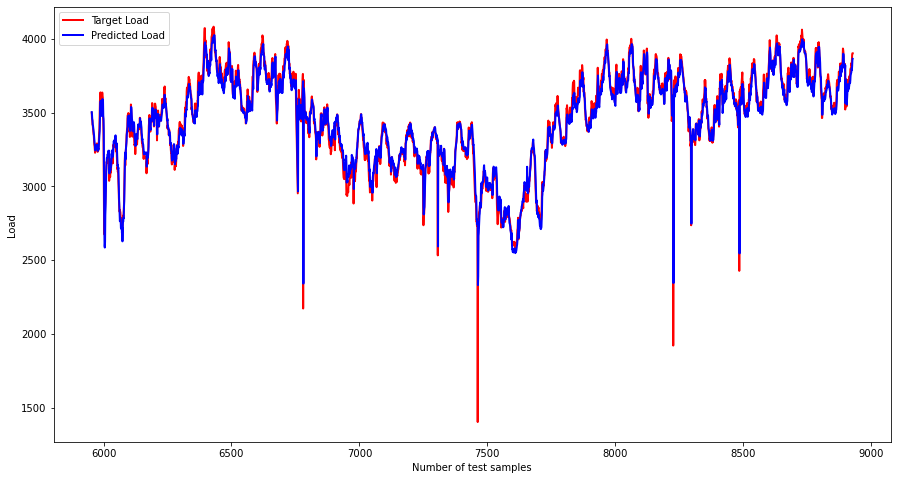

In [44]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [45]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.290620437966033


In [46]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.079765
dtype: float64


In [47]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5954  349800.582585
5955  345899.318537
5956  344799.670215
5957  341798.615458
5958  341199.131390
...             ...
8923  381906.641855
8924  384608.053728
8925  389209.321173
8926  390108.669644
8927  390108.449947

[2974 rows x 1 columns]


In [48]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+1
5954    18.680034
5955   640.981510
5956    45.261484
5957   649.356095
5958    19.231127
...           ...
8923   421.783186
8924  3309.778076
8925  5997.863877
8926  2143.321781
8927  1423.045060

[2974 rows x 1 columns]
y_t+1    7120.863203
dtype: float64


In [49]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    84.385207
dtype: float64


In [50]:
a=np.array(rescaled_predicted_load)

In [51]:
for i in  range(0,2879):
    b=a[i]
    print(b)

[3503.329]
[3485.318]
[3455.7263]
[3444.476]
[3417.378]
[3410.1404]
[3393.8862]
[3372.333]
[3356.9512]
[3345.805]
[3320.6526]
[3294.4807]
[3284.2878]
[3264.0146]
[3243.925]
[3259.8206]
[3254.665]
[3260.7175]
[3273.7314]
[3278.8643]
[3269.2244]
[3282.6006]
[3270.6162]
[3252.2185]
[3240.3345]
[3258.2202]
[3248.8906]
[3252.1375]
[3288.2397]
[3312.9062]
[3350.5007]
[3373.9443]
[3456.4185]
[3522.531]
[3562.3267]
[3579.448]
[3488.4653]
[3488.145]
[3486.9685]
[3477.3757]
[3508.8955]
[3554.5095]
[3591.7065]
[3578.9773]
[3577.1108]
[3480.2478]
[3457.7627]
[3375.8]
[3014.071]
[2738.491]
[2599.0862]
[2585.7656]
[2624.0872]
[2804.559]
[2856.545]
[2957.4448]
[3071.7192]
[3135.418]
[3158.1997]
[3193.7834]
[3193.0195]
[3199.5854]
[3218.0896]
[3211.0798]
[3200.0146]
[3241.8086]
[3230.7954]
[3224.4294]
[3241.8972]
[3088.1257]
[3111.902]
[3143.377]
[3117.139]
[3108.7336]
[3144.16]
[3132.5625]
[3142.0469]
[3185.1206]
[3221.8728]
[3195.4917]
[3227.1611]
[3247.4504]
[3231.9878]
[3201.718]
[3249.7744]
[3284

[3503.6824]
[3514.4006]
[3502.964]
[3555.0535]
[3634.3472]
[3680.2788]
[3712.4934]
[2341.4614]
[3500.7869]
[3663.973]
[3637.2148]
[3603.4956]
[3502.5852]
[3484.1812]
[3468.2185]
[3500.4663]
[3501.2622]
[3469.33]
[3460.588]
[3473.2832]
[3450.9756]
[3456.5835]
[3462.4534]
[3466.2432]
[3458.553]
[3453.6719]
[3433.4214]
[3412.6575]
[3383.3123]
[3410.3557]
[3400.1287]
[3361.8582]
[3456.2815]
[3493.0166]
[3500.3938]
[3490.7021]
[3507.5017]
[3519.442]
[3527.9531]
[3537.747]
[3581.2952]
[3588.2305]
[3567.1904]
[3563.2065]
[3544.2144]
[3546.9097]
[3544.5278]
[3534.291]
[3496.829]
[3451.0564]
[3459.0837]
[3441.0237]
[3437.4526]
[3410.2166]
[3377.1755]
[3365.7627]
[3356.5952]
[3332.0684]
[3203.353]
[3363.5522]
[3350.9587]
[3335.7007]
[3330.946]
[3342.5767]
[3341.8909]
[3322.8792]
[3369.7852]
[3338.2458]
[3334.3076]
[3337.244]
[3352.1462]
[3292.671]
[3354.888]
[3356.4868]
[3366.3716]
[3440.427]
[3479.2087]
[3471.435]
[3488.7378]
[3421.083]
[3397.8145]
[3396.5596]
[3377.0696]
[3389.2456]
[3434.8918

[3006.7217]
[3022.7036]
[3005.5789]
[3002.008]
[3023.4336]
[3016.4998]
[3016.537]
[2991.7026]
[2995.3154]
[2992.089]
[2997.3357]
[2990.719]
[3010.6025]
[3012.6934]
[2941.2295]
[3024.0266]
[3090.2888]
[3118.63]
[3134.0408]
[3132.0544]
[3065.1243]
[3077.0627]
[3087.1138]
[3084.5496]
[3106.0112]
[3105.9792]
[3114.2886]
[3100.3823]
[3129.8806]
[3107.6108]
[3073.9272]
[3039.5889]
[2951.126]
[2914.3228]
[2883.4575]
[2842.426]
[2843.295]
[2847.3767]
[2836.3845]
[2840.671]
[2872.8557]
[2931.275]
[2923.3257]
[2880.8118]
[2886.5513]
[2913.4978]
[2903.329]
[2865.7893]
[2787.371]
[2755.6504]
[2755.6821]
[2760.1716]
[2773.7217]
[2756.73]
[2723.6072]
[2753.1729]
[2723.5232]
[2746.603]
[2759.605]
[2784.1558]
[2825.1523]
[2846.2373]
[2859.6401]
[2804.4414]
[2775.1948]
[2816.662]
[2825.8628]
[2805.46]
[2850.3616]
[2846.0913]
[2838.312]
[2850.1382]
[2825.2231]
[2813.8572]
[2808.045]
[2824.0742]
[2859.0454]
[2867.5051]
[2801.2178]
[2783.8315]
[2753.2537]
[2746.8682]
[2741.895]
[2727.0479]
[2700.2832]
[26

[3857.61]
[3825.0027]
[3853.8484]
[3837.1746]
[3831.8506]
[3805.6436]
[3802.6555]
[3774.654]
[3768.0244]
[3748.3445]
[3738.5059]
[3713.4937]
[3701.6267]
[3692.785]
[3663.293]
[3646.4739]
[3632.1501]
[3639.96]
[3573.9114]
[3580.2837]
[3600.436]
[3617.2974]
[3611.5183]
[3611.943]
[3602.5737]
[3578.35]
[3562.0408]
[3520.6038]
[3509.7837]
[3498.5134]
[3455.6326]
[3436.9832]
[3399.2727]
[3419.2993]
[3425.2668]
[3469.7026]
[3416.446]
[3404.0776]
[3370.0886]
[3308.956]
[3316.9111]
[3301.689]
[2747.9058]
[3299.2024]
[3318.0774]
[3304.1074]
[3342.8286]
[3352.412]
[3375.0742]
[3387.839]
[3383.7395]
[3334.5645]
[3322.1458]
[3320.2935]
[3336.3386]
[3339.1006]
[3333.647]
[3312.1055]
[3315.84]
[3365.9888]
[3422.4775]
[3422.169]
[3425.4124]
[3403.156]
[3399.6907]
[3411.8564]
[3411.752]
[3392.4338]
[3351.2454]
[3370.5596]
[3373.8835]
[3438.237]
[3446.763]
[3393.0725]
[3337.829]
[3350.7063]
[3363.337]
[3404.8652]
[3400.6357]
[3408.1472]
[3446.1453]
[3429.4683]
[3436.8606]
[3491.6729]
[3479.9236]
[3487.